# **Segmentação Inteligente de Clientes com K-Means: Aplicação Prática de Modelos Avançados**

**Introdução**

Em um cenário cada vez mais competitivo, compreender o perfil e o comportamento dos clientes é fundamental para direcionar estratégias de negócio de forma assertiva. A capacidade de agrupar consumidores com características semelhantes permite personalizar ofertas, otimizar campanhas de marketing e aumentar a fidelização.  

Neste projeto, será aplicado um processo completo de ciência de dados para segmentar clientes com base em seus atributos, utilizando técnicas de análise exploratória, tratamento de dados e modelagem não supervisionada. 

O foco será o algoritmo K-Means, amplamente reconhecido por sua eficiência na identificação de padrões e na criação de agrupamentos coesos.

**Objetivo do Projeto**

O objetivo deste projeto é aplicar técnicas avançadas de ciência de dados para realizar a segmentação de clientes por meio do algoritmo de clustering K-Means.

O trabalho abrange desde a exploração e pré-processamento dos dados até a implementação e avaliação do modelo, consolidando conhecimentos adquiridos em análise exploratória, transformação de variáveis e modelagem não supervisionada.

O resultado esperado é identificar grupos com características semelhantes, permitindo insights valiosos para estratégias de marketing, personalização de ofertas e melhoria da experiência do cliente.

**Justificativa**

A segmentação de clientes é uma ferramenta essencial para empresas que desejam compreender melhor seu público e direcionar suas ações de forma mais eficaz.

Neste projeto, optou-se pelo uso do K-Means por ser um dos algoritmos mais difundidos e eficientes para problemas de clusterização, especialmente quando se busca identificar padrões em grandes volumes de dados.

Além de ter relevância prática no mercado, este estudo permite o exercício integrado de diversas etapas do fluxo de trabalho em ciência de dados, desde a preparação do dataset até a interpretação dos resultados, reforçando a capacidade de transformar dados brutos em conhecimento acionável.

**Exploração de Dados**

A primeira etapa do projeto consiste na análise exploratória do conjunto de dados.

O objetivo é compreender a natureza das variáveis, identificar tendências, distribuições e possíveis relações entre atributos.  
Durante essa fase, são utilizadas estatísticas descritivas e visualizações gráficas para detectar padrões e outliers, além de verificar a presença de dados ausentes ou inconsistentes que possam afetar a qualidade da análise

**Tratamento de Dados**

Com base nos resultados da exploração, é realizada a preparação dos dados para a modelagem.

Essa etapa inclui a limpeza de valores ausentes ou inconsistentes, a normalização ou padronização das variáveis numéricas e, quando necessário, a criação de variáveis derivadas para melhor representar a informação.  

Todas as decisões de pré-processamento são documentadas, considerando seu impacto na qualidade do modelo e na interpretabilidade dos resultados.

**Implementação do Algoritmo K-Means:**

Após o pré-processamento, o algoritmo K-Means é aplicado ao conjunto de dados tratado.  

O número de clusters (k) é definido com base em métodos como o Elbow Method ou o Silhouette Score, buscando um equilíbrio entre simplicidade e capacidade de representar a estrutura dos dados.

O processo de modelagem inclui ajustes de parâmetros, execução do algoritmo e avaliação da coerência dos agrupamentos obtidos.

Por fim, os resultados são interpretados e discutidos, destacando as características que diferenciam cada grupo identificado.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

# Exploração dos Dados

In [1]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv', sep=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Verificando a distribuição geral das variáveis.

In [5]:
fig = px.box(df, y=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], title="Distribuição das Variáveis")
fig.show()


Visualizando quais são os clientes que estão com Income acima do Q3.

In [6]:
print(df.loc[df['Annual Income (k$)'] >= 137])

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


Identificamos dois clientes com **Annual Income = 137**, ambos na mesma faixa etária (30-32 anos).  
Embora esses valores estejam acima do terceiro quartil (**Q3 = 126**), **não podem ser considerados outliers estatísticos**, pois estão dentro da distribuição esperada do dataset.  

Apesar da similaridade na renda, os clientes apresentam padrões de consumo distintos:  
- **Cliente 199:** Baixo Spending Score (18) → Perfil mais conservador, com tendência a menor consumo.  
- **Cliente 200:** Alto Spending Score (83) → Gastos mais ativos, possivelmente um consumidor premium.  

Essa segmentação pode ser útil para estratégias de marketing, possibilitando a personalização de ofertas.  
Clientes com menor índice de gastos podem ser incentivados por meio de descontos exclusivos, enquanto consumidores mais ativos podem ser beneficiados com programas de fidelidade e experiências premium.  

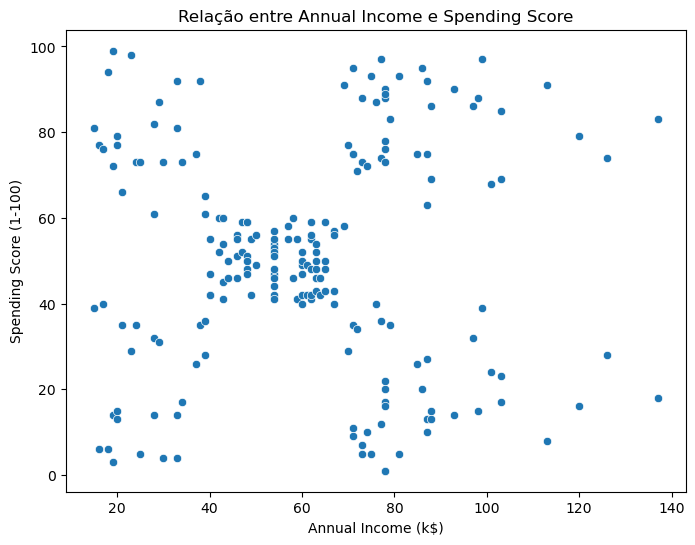

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.title("Relação entre Annual Income e Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


A análise do gráfico de dispersão indica que **não há uma relação linear clara** entre renda anual (**Annual Income**) e padrão de gastos (**Spending Score**). A distribuição dos pontos sugere que clientes com diferentes faixas de renda apresentam hábitos de consumo variados, sem um padrão previsível.  

Podemos identificar de quatro a cinco grupos distintos:
- Clientes com **Baixa renda, baixo Spending Score** → Clientes econômicos que gastam pouco.
- Clientes com **Baixa renda, alto Spending Score** → Possível perfil de consumo impulsivo.
- Clientes do **Grupo intermediário** → Um conjunto de clientes com renda e gastos moderados.
- Clientes com **alta renda e baixo Spending Score** → Tendência a menor consumo, possivelmente um perfil mais conservador.  
- Clientes com **alta renda e alto Spending Score** → Gastos mais ativos, possível perfil premium ou impulsivo.  

Essa dispersão sugere que o comportamento de consumo não está diretamente ligado à renda e reforça a necessidade de **segmentação baseada em comportamento**.  
A **clusterização** e a utilização do **K-Means** podem ajudar elaboração de ações mais precisas para campanhas de marketing e personalização de ofertas.  


In [8]:
fig = px.box(df, x='Gender', y='Annual Income (k$)', 
             title="Distribuição de Renda por Gênero", 
             color='Gender')

contagem_genero = df['Gender'].value_counts()
for gender, count in zip(contagem_genero.index, contagem_genero.values):
    fig.add_annotation(x=gender, y=df['Annual Income (k$)'].max(), 
                       text=f"Total: {count}", showarrow=True, font=dict(size=12))
fig.show()

A análise do gráfico de boxplot indica que **não há variação significativa na renda entre os gêneros**.  
Observam-se alguns clientes com rendas elevadas em ambos os grupos, sugerindo que a distribuição de renda não está concentrada apenas em um gênero específico.  

Além disso, os dados indicam que:  
- O **intervalo interquartil (IQR)** para ambos os gêneros apresenta padrões semelhantes, Feminino = 60 e Masculino = 62,5
- A contagem de clientes revela uma distribuição equilibrada entre os gêneros, reforçando que as análises podem ser feitas sem viés de amostragem.  

Observação relevante para estratégias de **personalização de ofertas** e segmentação de marketing, garantindo que ações específicas sejam baseadas em **comportamento** em vez de apenas fatores demográficos.  


In [9]:
fig = px.scatter(df, x='Age', y='Spending Score (1-100)', 
                 title="Relação entre Idade e Spending Score", 
                 color='Age', 
                 color_continuous_scale='viridis')

fig.show()


O gráfico mostra que **não há uma relação linear clara** entre idade e Spending Score.  
Observam-se padrões distintos entre diferentes faixas etárias, indicando dois possíveis grupos de comportamento:  

- **Jovens e Adultos (~18-40 anos)** → Maior variabilidade no Spending Score, incluindo consumidores com gastos elevados e outros mais conservadores.  
- **Mais velhos (>40 anos)** → Maior concentração de Spending Score em valores mais baixos, sugerindo um perfil de consumo mais contido.  

Essa segmentação sugere que **o fator idade pode influenciar hábitos de consumo**, mas não de forma determinística.  
Podemos utilizar essa análise nas estratégias de marketing, ao personalizar abordagens para diferentes faixas etárias.  


# Tratamento dos Dados

Codificando e padronizando os dados para realizar a manipulação com o modelo.

In [10]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
padronizar_col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df[padronizar_col] = scaler.fit_transform(df[padronizar_col])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704
2,3,1,-1.352802,-1.700830,-1.715913
3,4,1,-1.137502,-1.700830,1.040418
4,5,1,-0.563369,-1.662660,-0.395980


Escolhemos padronizar os dados para garantir que estejam todos na mesma escala, ajudando o modelo a medir a distancia dos clusters.  
Evitando que variáveis com escalas maiores dominem a análise estatística.

In [12]:
df.drop(columns=['CustomerID'], inplace=True)

# Modelagem dos Dados - K-Means

Vamos aplicar o algoritimo do K-Means com número de cluster 4, considerando a análise feita anteriormente na parte de exploração de dados, na relação de renda e gasto

In [13]:
kmeans_clientes = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans_clientes.fit_transform(df)

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([[1.78182658, 2.97486515, 3.36725653, 1.63734866, 3.39336397],
       [0.78414883, 3.22870301, 4.04645605, 2.11227989, 2.90724232],
       [2.92575124, 3.1877548 , 3.24152676, 2.09193717, 4.12629349],
       [0.58329326, 3.00839684, 3.89747553, 1.87217006, 2.82587643],
       [1.66809196, 2.17697168, 3.02496572, 1.33512608, 3.15397839],
       [0.59206231, 3.03200535, 3.87217756, 1.83509846, 2.81130816],
       [2.97545044, 2.37569663, 2.82205328, 2.02810448, 3.9772819 ],
       [0.77705243, 3.33278985, 4.27735491, 2.32519653, 2.78444084],
       [4.11440909, 2.05517992, 3.18662113, 3.33749339, 4.62820854],
       [0.65582592, 2.4882951 , 3.5545615 , 1.63272263, 2.6552859 ],
       [3.97767587, 1.85145415, 3.26028567, 3.33178791, 4.47134304],
       [1.14094167, 2.92622525, 4.21633103, 2.49504302, 2.70463474],
       [3.46051346, 1.57452313, 2.93757847, 2.72021462, 4.09308962],
       [0.48156731, 2.89223193, 3.76638131, 1.7567405 , 2.66309144],
       [2.78259355, 2.12749674, 2.

In [14]:
centroides = kmeans_clientes.cluster_centers_
print('Centroides: \n', centroides)

Centroides: 
 [[ 0.59090909 -0.97439592 -1.32954532  1.13217788]
 [ 0.56896552  1.19862745 -0.46098141 -0.32703818]
 [ 0.41176471  0.17329545  1.06645385 -1.2980103 ]
 [ 0.65957447 -0.78172248 -0.40306917 -0.21591396]
 [ 0.53846154 -0.44191719  0.99158305  1.23950275]]


In [15]:
labels = kmeans_clientes.labels_
print('Labels: \n', labels)

Labels: 
 [3 0 3 0 3 0 3 0 1 0 1 0 1 0 3 0 3 0 1 0 3 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1
 0 3 0 1 0 1 3 1 0 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 4 3 4 2 4 2 4 2 4 3 4 2 4 2 4 2 4 2 4 3 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


Análisando os centroides na matriz de dispersão de renda x gasto

In [16]:
df_kmeans = pd.DataFrame({
    'Renda_Anual': df['Annual Income (k$)'],
    'Score_Gasto': df['Spending Score (1-100)'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_kmeans, x='Renda_Anual', y='Score_Gasto', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Cluesters Renda Anual e Score de Gasto')

fig.add_scatter(x=centroides[:, 0], y=centroides[:, 1],
                mode='markers', marker=dict(color='black', symbol='x', size=14),
                name='Centroides')

fig.update_layout(xaxis_title='Renda Anual', yaxis_title='Score de Gasto', 
                  legend_title='Cluster')
fig.show()

O gráfico de dispersão mostra a segmentação dos clientes em **cinco clusters distintos**, agrupados com base na relação entre **renda anual** e **Spending Score**. A posição dos clusters sugere padrões de consumo bem definidos:  

- **Cluster 0 (verde)** → Grupo centralizado, possivelmente clientes com renda e gastos moderados.  
- **Cluster 1 (roxo)** → Distribuído na parte direita do gráfico, indicando clientes com alta renda e variação no Spending Score.  
- **Cluster 2 (azul)** → Localizado na parte esquerda, possivelmente clientes com renda mais baixa e comportamento de consumo específico.  
- **Cluster 3 (laranja)** → Espalhado na parte superior direita, sugerindo consumidores de alta renda com gastos elevados.  
- **Cluster 4 (vermelho)** → Concentrado na parte superior, indicando clientes com alto Spending Score, independentemente da renda.  

Os **centroides** posicionados no gráfico reforçam a separação clara entre os grupos, sugerindo que a segmentação pode ser útil para estratégias de **personalização de ofertas** e **marketing direcionado**.  


Análisando os centroides na matriz de dispersão de idade e gasto

In [17]:
df_kmeans = pd.DataFrame({
    'Idade': df['Age'],
    'Score_Gasto': df['Spending Score (1-100)'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_kmeans, x='Idade', y='Score_Gasto', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Cluesters Idade e Score de Gasto')

fig.add_scatter(x=centroides[:, 0], y=centroides[:, 1],
                mode='markers', marker=dict(color='black', symbol='x', size=14),
                name='Centroides')

fig.update_layout(xaxis_title='Idade', yaxis_title='Score de Gasto', 
                  legend_title='Cluster')
fig.show()

# Avaliação do Modelo

Aplicando Método Silhouette e Elbow para verificar a qualidade do Cluster

In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.3498


O **Silhouette Score** obtido foi **0.3498**, o que sugere uma **segmentação moderadamente definida**.  
Esse valor indica que os clusters possuem certa separação, mas ainda há pontos próximos das fronteiras entre os grupos. 

Interpretações:
- **Valores próximos de 1** indicam clusters bem separados, enquanto valores perto de **0** sugerem agrupamentos menos definidos.  
- O resultado **não é ruim**, mas pode indicar que alguns clientes estão em zonas de transição entre clusters, afetando a precisão da segmentação.  
- Uma análise visual dos clusters pode ajudar a entender se ajustes no número de **k** (quantidade de clusters) pode melhorar a separação dos grupos.  

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=

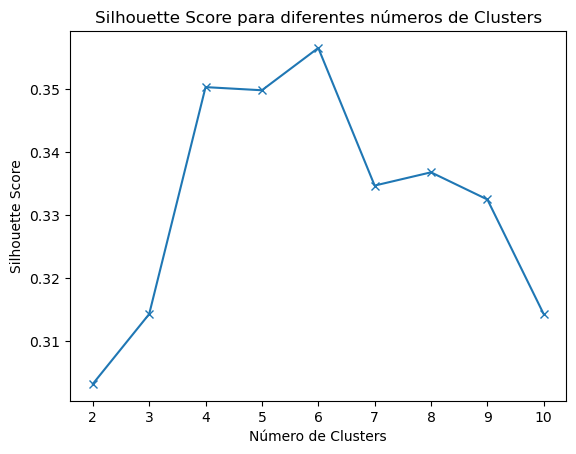

In [19]:
sse = []  

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df)

    score = silhouette_score(df, labels)
    sse.append(score)

plt.plot(range(2, 11), sse, marker='x')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de Clusters')
plt.show()


No gráfico do Silhouette Score podemos identificar que até 6 clusters a qualidade da segmentação melhora.  
O pico em 6 clusters sugere que essa pode ser a melhor escolha para garantir uma segmentação mais clara e bem definida.

**Vamos aplicar o Metodo Elbow para validar, ou não, a sugestão.**

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=

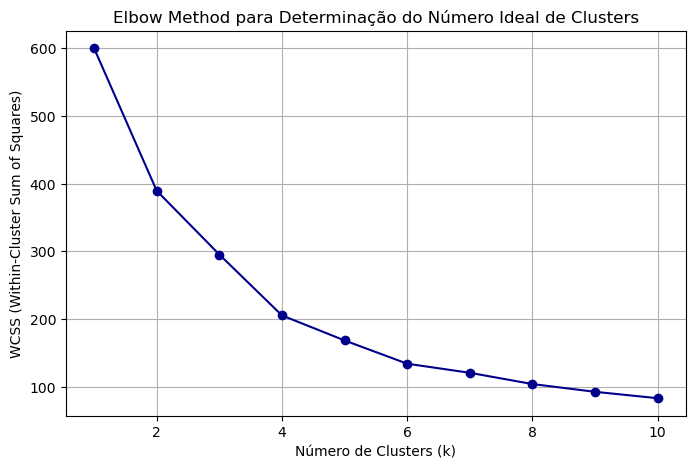

In [20]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, '-o', color='darkblue')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method para Determinação do Número Ideal de Clusters')
plt.grid()
plt.show()


Segundo o gráfico do Elbow Method, o melhor número de clusters parece ser 4, pois é onde ocorre a "dobra" significativa da curva.  
Após esse ponto, a redução da variabilidade dentro dos clusters se torna menos expressiva, indicando que adicionar mais clusters pode não melhorar significativamente a segmentação.

**Comparação com o Silhouette Score:**  
O Silhouette Score sugeria 6 clusters, mas o método Elbow aponta 4 clusters como uma opção mais equilibrada.  

**Vamos testar ambos os valores (K=4 e K=6) e avaliar qualitativamente qual faz mais sentido para a segmentação dos clientes.**

In [21]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
centroids_4 = kmeans_4.cluster_centers_

df_centroids_4 = pd.DataFrame(centroids_4, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

fig_4 = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                   color=df['Cluster_4'].astype(str), 
                   title="Segmentação dos Clientes com K=4 Clusters")

fig_4.add_scatter(x=df_centroids_4['Annual Income (k$)'], y=df_centroids_4['Spending Score (1-100)'], 
                  mode='markers', marker=dict(size=12, color='black', symbol='x'), name="Centroides")
fig_4.show()

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



A segmentação com K=4 mostra clusters bem definidos, indicando padrões claros de agrupamento.  
Observamos uma distribuição distinta dos grupos, onde alguns estão mais concentrados, enquanto outros apresentam maior dispersão. Em especial, os clusters 2 e 0 com maior variabilidade, sugerindo que podem incluir clientes com comportamentos distintos dentro de suas respectivas categorias.

In [22]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
df['Cluster_6'] = kmeans_6.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
centroids_6 = kmeans_6.cluster_centers_

df_centroids_6 = pd.DataFrame(centroids_6, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

fig_6 = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                   color=df['Cluster_6'].astype(str), 
                   title="Segmentação dos Clientes com K=6 Clusters")

fig_6.add_scatter(x=df_centroids_6['Annual Income (k$)'], y=df_centroids_6['Spending Score (1-100)'], 
                  mode='markers', marker=dict(size=12, color='black', symbol='x'), name="Centroides")
fig_6.show()

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ana Paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



A segmentação com K=6 apresenta uma divisão mais detalhada dos clientes, identificando grupos com padrões distintos de comportamento.  
Os clusters estão bem definidos, mas alguns grupos, como os clusters 2 e 4, mostram maior dispersão, indicando clientes com características mais variadas dentro desses segmentos.   
A presença dos centroides reforça a separação entre os agrupamentos, sugerindo que K=6 pode capturar nuances mais refinadas na segmentação.

**Silhouette Score**

In [23]:
score_4 = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster_4'])
score_6 = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster_6'])

print(f"Silhouette Score para K=4: {score_4:.4f}")
print(f"Silhouette Score para K=6: {score_6:.4f}")

Silhouette Score para K=4: 0.4040
Silhouette Score para K=6: 0.4284


O Silhouette Score indica a qualidade da separação dos clusters, sendo um fator essencial na escolha do número ideal de agrupamentos.

O valor de 0.4311 para K=6 sugere que os clusters estão razoavelmente bem definidos, com uma separação mais clara entre os grupos.  
Já o score de 0.4040 para K=4 mostra uma segmentação coerente, mas com um leve aumento na sobreposição entre alguns clusters.  

A diferença entre os valores não é extrema, mas reforça a ideia de que K=6 pode capturar padrões mais refinados na segmentação, permitindo uma melhor discriminação entre grupos com características distintas.


In [24]:
df.drop(columns=['Cluster_4'], inplace=True)

In [25]:
df.rename(columns={'Cluster_6': 'Clusters'}, inplace=True)

Invertendo a padronização para visualizar os clusters com os dados originais 

In [26]:
df[padronizar_col] = scaler.inverse_transform(df[padronizar_col])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19.0,15.0,39.0,0
1,0,21.0,15.0,81.0,0
2,1,20.0,16.0,6.0,5
3,1,23.0,16.0,77.0,0
4,1,31.0,17.0,40.0,5


# Visualizações finais

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ana Paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



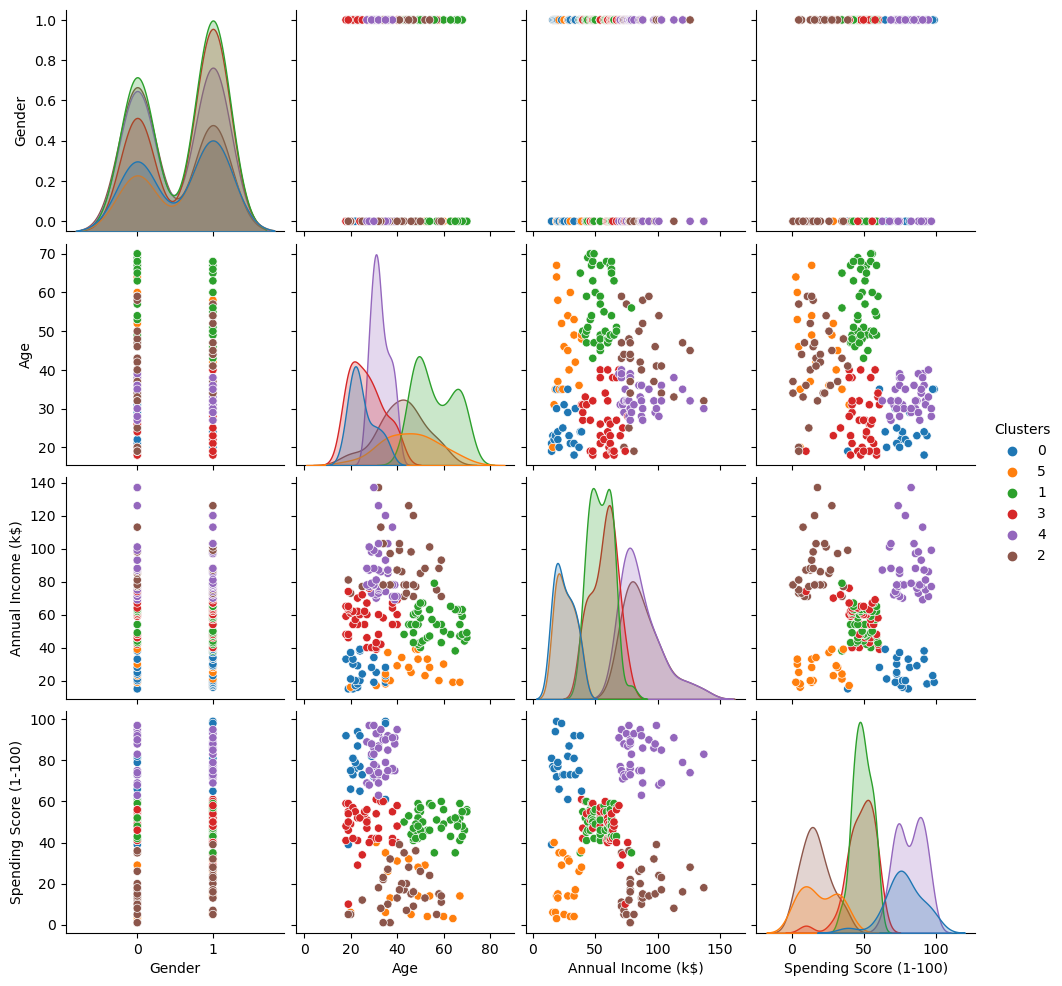

In [27]:
df['Clusters'] = kmeans_6.labels_.astype('str')
sns.pairplot(df, hue='Clusters')

A análise dos clusters revela padrões claros na segmentação dos clientes. Observamos que diferentes combinações de variáveis favorecem o agrupamento de certos perfis, destacando tendências de comportamento.  
A relação entre idade e renda se mostra influente, indicando que faixas etárias distintas possuem padrões de consumo específicos.  
Além disso, o Spending Score varia significativamente entre os grupos, evidenciando perfis de compra diversificados e oportunidades para estratégias personalizadas. 


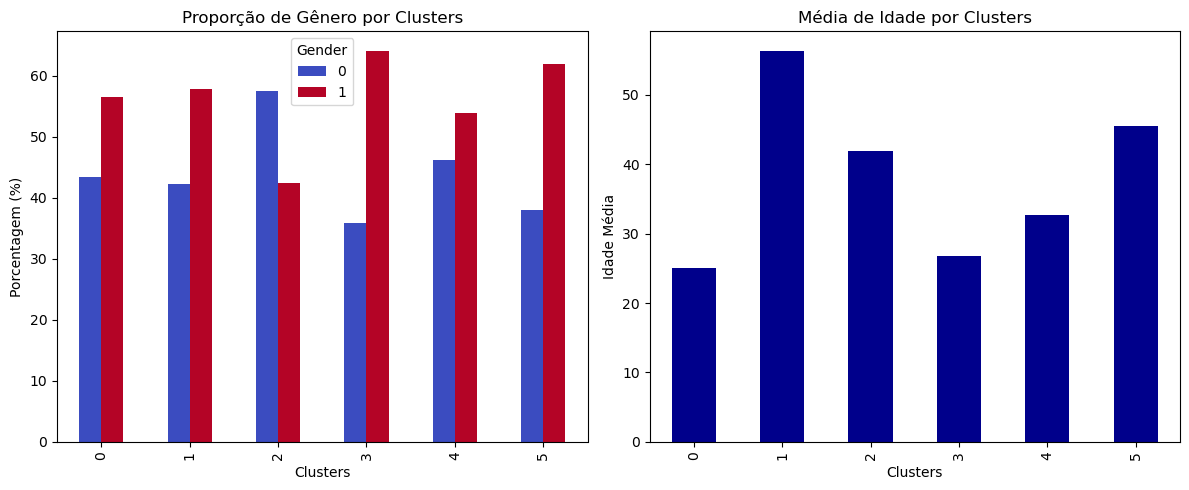

In [29]:
proporcao_genero = df.groupby('Clusters')['Gender'].value_counts(normalize=True).unstack() * 100
media_idade = df.groupby('Clusters')['Age'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,5))

proporcao_genero.plot(kind='bar', ax=ax[0], colormap='coolwarm')
ax[0].set_title("Proporção de Gênero por Clusters")
ax[0].set_ylabel("Porcentagem (%)")

media_idade.plot(kind='bar', ax=ax[1], color='darkblue')
ax[1].set_title("Média de Idade por Clusters")
ax[1].set_ylabel("Idade Média")

plt.tight_layout()
plt.show()

Os gráficos revelam insights importantes sobre a distribuição demográfica dos clusters. 

- Proporção de Gênero por Clusters → Alguns grupos apresentam uma predominância clara de um dos gêneros, sugerindo que certos perfis de consumo podem estar mais associados a um público específico.  

- Média de Idade por Clusters → A idade média varia significativamente entre os clusters, com alguns grupos concentrando clientes mais jovens e outros refletindo um perfil mais maduro, o que pode influenciar padrões de compra e preferências de consumo.


# **Aplicações Comerciais e Estratégias de Segmentação**  

A análise dos clusters revelou padrões distintos de comportamento entre os clientes, permitindo uma segmentação mais eficiente e aplicável em estratégias comerciais.  

## **1️⃣ Perfis de Clientes e Estratégias de Marketing**  

Cada cluster representa um perfil específico de consumidor, possibilitando **personalização de ofertas**, campanhas direcionadas e otimização da experiência do cliente.  

- **Cluster 0 – Consumidores Econômicos** 💰  
  📌 Foco em **preços acessíveis**, descontos e fidelização para maximizar o engajamento.  
  📌 Programas de **cashback** e cupons promocionais incentivam compras recorrentes.  

- **Cluster 1 – Jovens Impulsivos** 🛍️  
  📌 Estratégias de **marketing digital** e campanhas baseadas em tendências.  
  📌 **Gamificação e experiências exclusivas** podem aumentar a retenção.  

- **Cluster 2 – Clientes Tradicionais** 🏡  
  📌 Foco na **credibilidade e qualidade do produto**.  
  📌 **Recomendações personalizadas** e atendimento próximo reforçam a relação com a marca.  

- **Cluster 3 – Consumidores Premium** 🔝  
  📌 Ofertas **exclusivas e personalizadas** para esse público de alto valor.  
  📌 **Eventos privados e programas VIP** aumentam a percepção de exclusividade.  

- **Cluster 4 – Clientes Conservadores** 🛑  
  📌 Estratégias focadas em **confiança e atendimento diferenciado**.  
  📌 **Produtos essenciais e benefícios** destacam a solidez da marca.  

- **Cluster 5 – Compradores Variáveis** 🔄  
  📌 Campanhas adaptáveis com **promoções sazonais e estratégias de retenção**.  
  📌 **Automação de marketing** para detectar períodos de alta e baixa atividade.  


## **2️⃣ Otimização de Investimentos em Marketing**  

📊 **Segmentação eficiente** permite **reduzir custos com campanhas não direcionadas** e aumentar o retorno sobre investimento (**ROI**).  
📌 Estratégias de **publicidade personalizada** maximizam a conversão e engajamento.   


## **3️⃣ Aplicações em Experiência do Cliente**  

🎯 **Personalização no atendimento** e programas de fidelidade baseados no perfil do cliente.  
🔍 **Inteligência de dados** para prever comportamentos de consumo e adaptar ofertas.  
🚀 **Expansão de estratégias digitais**, conectando os clusters às preferências de compra online. 